# How to use CGM model interface

In [1]:
from astropy import units as un, constants as cons
import numpy as np
import matplotlib.pyplot as plt
import cgm_model_interface as CMI

# Cooling module

In [2]:
#this example initializes cooling module for the collisional ionisation equilibrium
import CloudyCooling as CC
cooling = CC.CIE()

# Halo potential

In [3]:
#this example initializes an NFW potential
import HaloPotential as Halo
z=0.01
Mvir=2e13*un.M_sun
cvir=5
potential = Halo.NFW(Mvir=Mvir,z=z,cvir=cvir)

# Boundary conditions module

In [4]:
#setting boundary conditions
import Boundary as BC
Rout=[300]*un.kpc #outer boundary
Tout=[0.2]*un.keV #temperature boundary condition
boundary = BC.Boundary(Rout=Rout,T=Tout)

# Metallicity module

In [5]:
# this example initializes the power law metallicity profile
import Metallicity as Metal
metallicity = Metal.Uniform_Metallicity(Zuniform=0.3)
#metallicity = Metal.PowerLaw_Metallicity(Rcore=100*un.kpc,Zcore=0.3,slope=0.2)

# Precipitation model

In [6]:
#this example initializes precipitation-limited NFW model
import PrecipitationModel as Precipitation
tcool_tff=20
precipitation = Precipitation.pNFW(potential=potential,cooling=cooling,metallicity=
                                   metallicity,boundary=boundary,
                                   tcool_tff=tcool_tff,z=z)

# Cooling Flow Model

In [7]:
import CoolingFlow as CF
from importlib import reload
reload(CF)

<module 'CoolingFlow' from '/home/jonathan/Dropbox/other_repositories/cgm_models/CoolingFlow.py'>

In [8]:
Mdot   = 1*un.Msun/un.yr
R_circ = 10*un.kpc
cf = CF.CoolingFlow(potential,cooling,metallicity,None,
                    Mdot = Mdot,R_circ=R_circ,pr=True,return_all_results=False)

Integrated with log T(R_circ)=5.00, maximum radius reached 120 kpc, stop reason: sonic point
Integrated with log T(R_circ)=5.50, maximum radius reached 166 kpc, stop reason: unbound
Integrated with log T(R_circ)=5.25, maximum radius reached 368 kpc, stop reason: sonic point
Integrated with log T(R_circ)=5.38, maximum radius reached 621 kpc, stop reason: unbound
Integrated with log T(R_circ)=5.31, maximum radius reached 855 kpc, stop reason: sonic point
Integrated with log T(R_circ)=5.34, maximum radius reached 999 kpc, stop reason: max R reached


# Plotting results 

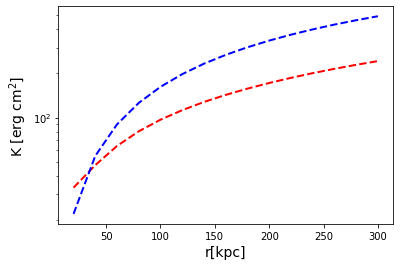

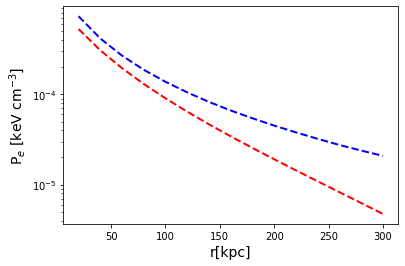

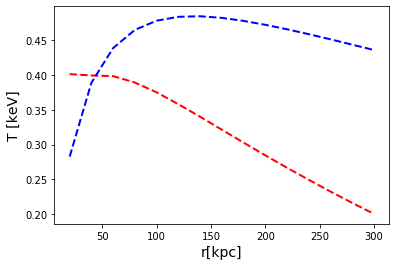

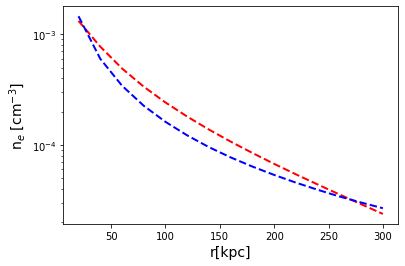

In [9]:
r=np.linspace(20,300,15)*un.kpc

#entropy profile
for i,model in enumerate((precipitation, cf)):
    plt.plot(r,model.get_entropy_profile(r).to('keV*cm**2'),ls='--',c='rb'[i],lw=2)
plt.xlabel(r'r[kpc]',fontsize=14)
plt.ylabel(r'K [erg $\rm cm^2$]',fontsize=14)
plt.yscale('log')
plt.show()

#pressure profile
for i,model in enumerate((precipitation, cf)):
    plt.plot(r,model.get_electron_thermal_pressure_profile(r).to('keV/cm**3'),
         ls='--',c='rb'[i],lw=2)
plt.xlabel(r'r[kpc]',fontsize=14)
plt.ylabel(r'P$_e$ [keV $\rm cm^{-3}$]',fontsize=14)
plt.yscale('log')
plt.show()

#temperature density profile
for i,model in enumerate((precipitation, cf)):
    plt.plot(r,model.get_temperature_profile(r).to('keV'),ls='--',c='rb'[i],lw=2)
plt.xlabel(r'r[kpc]',fontsize=14)
plt.ylabel(r'T [keV]',fontsize=14)
plt.show()

#electron density profile
for i,model in enumerate((precipitation, cf)):
    plt.plot(r,model.get_electron_density_profile(r),ls='--',c='rb'[i],lw=2)
plt.xlabel(r'r[kpc]',fontsize=14)
plt.ylabel(r'n$_e$ [$\rm cm^{-3}$]',fontsize=14)
plt.yscale('log')
plt.show()

In [316]:
from importlib import reload
reload(Halo)

<module 'HaloPotential' from '/Users/jonathanstern/Dropbox/github_repositories/cgm_models/HaloPotential.py'>

In [317]:
#this example initializes an NFW potential
import HaloPotential as Halo
z=0.0001
Mvir=1e12*un.M_sun
cvir=10
potential = Halo.NFW_withGalaxy(Mvir=Mvir,z=z,cvir=cvir,Mgalaxy=6e10*un.Msun,scale_length=2.5*un.kpc)
potential1 = Halo.NFW_withGalaxy(Mvir=1e-10*un.Msun,z=z,cvir=cvir,Mgalaxy=6e10*un.Msun,scale_length=2.5*un.kpc)
potential0 = Halo.NFW(Mvir=Mvir,z=z,cvir=cvir)

In [318]:
import pylab as pl

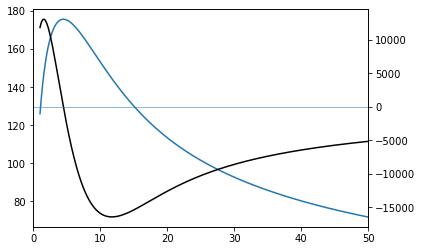

In [319]:
r=np.arange(1,50,0.1)*un.kpc
pl.plot(r,potential1.vc(r))
Rd = 2.5*un.kpc; Mgalaxy=6e10*un.Msun
dvc2_glx_dr = ((cons.G*Mgalaxy / r).to('km**2/s**2')/r * 
                       (np.e**(-r/Rd)*(r**2+Rd**2+r*Rd)/Rd**2 - 1))
pl.twinx()
pl.plot(r,(r*dvc2_glx_dr),c='k')
pl.xlim(0,50)
pl.axhline(0.,lw=0.5)

(50, 200)

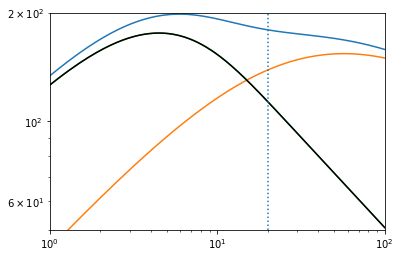

In [323]:
r=np.arange(0.1,300,0.1)*un.kpc
pl.plot(r,potential.vc(r))
pl.plot(r,potential0.vc(r))
pl.plot(r,potential1.vc(r))
pl.plot(r,Halo.NFW.vc(potential1,r),c='k')
pl.xlim(1,100)
pl.loglog()
pl.axvline(20,ls=':')
pl.ylim(50,200)

In [324]:
140**2/(110**2+140**2)

0.6182965299684543

139.98813908816663 km / s 0.6151057692628453 0.37976743672585017 110.73554331844367 km / s 0.38489423073715445 -0.4920498762061647
1.4678395542064534e-08 km / s 1.7570458374629584e-20 -0.9361339668640158 110.73554331844367 km / s 0.9999999999999999 -0.4920498762061647


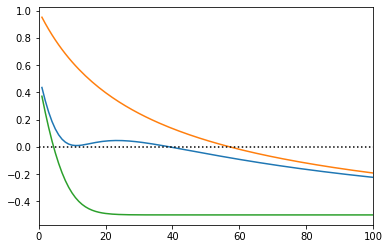

In [321]:
r=np.arange(1,300,1)*un.kpc
pl.plot(r,potential.dlnvc_dlnR(r))
pl.plot(r,potential0.dlnvc_dlnR(r))
pl.plot(r,potential1.dlnvc_dlnR(r))
pl.xlim(0,100)
pl.axhline(0,c='k',ls=':')

1.7570458374629584e-20


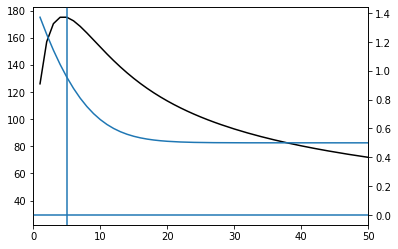

In [269]:
pl.plot(r,potential1.vc(r),c='k')
pl.twinx()
pl.plot(r,potential1.dlnvc_dlnR(r)+1)
pl.xlim(0,50)
pl.axhline(0)
pl.axvline(5)


(0.0, 1000.0)

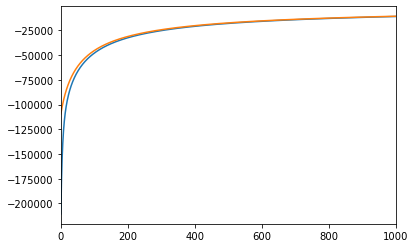

In [135]:
r=np.arange(0.1,1000,0.1)*un.kpc
pl.plot(r,potential.Phi(r))
pl.plot(r,potential0.Phi(r))
pl.xlim(0,1000)

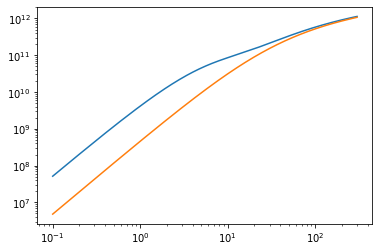

In [107]:
r=np.arange(0.1,300,0.1)*un.kpc
pl.loglog(r,potential.enclosedMass(r))
pl.loglog(r,potential0.enclosedMass(r))
#pl.ylim(0,1e11)
#pl.xlim(0,50)

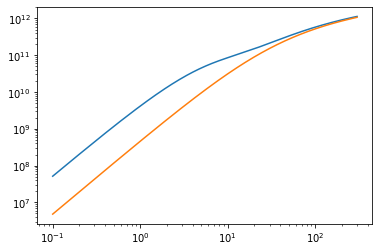

In [107]:
r=np.arange(0.1,300,0.1)*un.kpc
pl.loglog(r,potential.vc(r))
pl.loglog(r,potential0.ss(r))
#pl.ylim(0,1e11)
#pl.xlim(0,50)

In [38]:
Rd = 3
enclosedMass = lambda R: 2*np.pi*-Rd*np.e**-(R/Rd)*(Rd+R) - 2*np.pi*-Rd**2


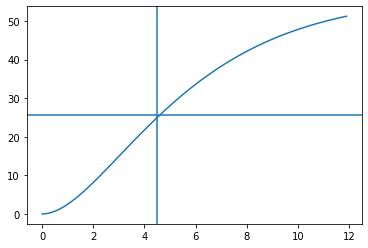

In [41]:
xs = np.arange(0,4*Rd,0.1)
pl.plot(xs,enclosedMass(xs))
pl.axhline(0.5*enclosedMass(4*Rd))
pl.axvline(1.5*Rd)

In [37]:
3.825/2.5

1.53

In [74]:
import sympy as sp

In [204]:
r = sp.symbols('r')
Rd = sp.symbols('R_d')
MtoMstar = (1-sp.exp(-r/Rd)*(r+Rd)/Rd)
vc2_to_G = MtoMstar/r
g_to_G = MtoMstar/r**2

In [205]:
sp.simplify(sp.integrate(sp.exp(-r/Rd)*r,r)/Rd**2)

-(R_d + r)*exp(-r/R_d)/R_d

In [216]:
dvc2_to_dr = sp.diff(vc2_to_G,r)

In [223]:
sp.expand(sp.simplify(dvc2_to_dr))

-1/r**2 + exp(-r/R_d)/r**2 + exp(-r/R_d)/(R_d*r) + exp(-r/R_d)/R_d**2

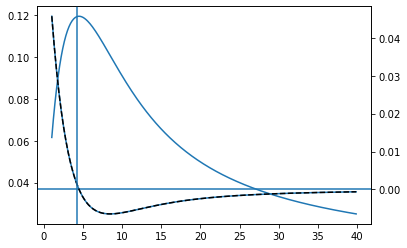

In [226]:
vals = np.arange(1,40,0.1)
MtoMstars = [MtoMstar.subs(Rd,2.5).subs(r,val) for val in vals]
vc2_to_Gs = [vc2_to_G.subs(Rd,2.5).subs(r,val) for val in vals]
pl.plot(vals,vc2_to_Gs)
dvc2_to_drs = [dvc2_to_dr.subs(Rd,2.5).subs(r,val) for val in vals]
dvc2_glx_dr = ((1 / vals)/vals * 
                       (np.e**(-vals/2.5)*(vals**2+2.5**2+vals*2.5)/2.5**2 - 1))
pl.twinx()
pl.axhline(0)
pl.plot(vals,dvc2_to_drs)
pl.plot(vals,dvc2_glx_dr,ls='--',c='k')
pl.axvline(4.2)

In [92]:
Phi = sp.integrate(g_to_G,r)

In [94]:
Phi

-1/r + exp(-r/R_d)/r

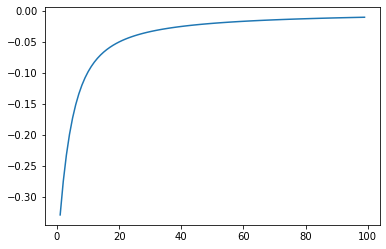

In [99]:
vals = np.arange(1,100)
pl.plot(vals,[Phi.subs(Rd,2.5).subs(r,val) for val in vals])

In [325]:
Rs, r = sp.symbols("R_s r")
M = Rs**3*(sp.log((Rs+r)/Rs) - r/(Rs+r))
vc2_to_G = M/r

In [326]:
vc2_to_G

R_s**3*(-r/(R_s + r) + log((R_s + r)/R_s))/r

In [327]:
sp.simplify(sp.diff(vc2_to_G,r)/vc2_to_G*r)

(-r**2 + (R_s + r)*(-r + (R_s + r)*log((R_s + r)/R_s)))/((R_s + r)*(r - (R_s + r)*log((R_s + r)/R_s)))